In [1]:
import math
import pandas as pd
import numpy as np
import datetime as dt
import time

# import data visualization libraries
import matplotlib.pyplot as plt
import matplotlib.dates as mdates



In [2]:
def get_data(path):
    dataframe = pd.read_csv(path)
    print(dataframe.head())
    return
      

    
  

data = get_data('GOOGL.csv')

         Date       Open       High        Low      Close  Adj Close    Volume
0  2004-08-19  50.050049  52.082081  48.028027  50.220219  50.220219  44659000
1  2004-08-20  50.555557  54.594593  50.300301  54.209209  54.209209  22834300
2  2004-08-23  55.430431  56.796795  54.579578  54.754753  54.754753  18256100
3  2004-08-24  55.675674  55.855854  51.836838  52.487488  52.487488  15247300
4  2004-08-25  52.532532  54.054054  51.991993  53.053055  53.053055   9188600


In [3]:
import csv

with open('GOOGL.csv', 'r') as infile, open('GOOGL_ORDER.csv', 'a') as outfile:
    
    fieldnames = ['Date', 'Open', 'Volume','High','Low','Close', 'Adj Close']
    writer = csv.DictWriter(outfile, fieldnames=fieldnames)

    writer.writeheader()
    for row in csv.DictReader(infile):
      
        writer.writerow(row)

In [33]:
dataset=pd.read_csv('GOOGL_ORDER.csv')
print("")
print(dataset.head())
dataset1=pd.read_csv('GOOGL.csv')
print(dataset1.head())


         Date       Open    Volume       High        Low      Close  Adj Close
0  2004-08-19  50.050049  44659000  52.082081  48.028027  50.220219  50.220219
1  2004-08-20  50.555557  22834300  54.594593  50.300301  54.209209  54.209209
2  2004-08-23  55.430431  18256100  56.796795  54.579578  54.754753  54.754753
3  2004-08-24  55.675674  15247300  55.855854  51.836838  52.487488  52.487488
4  2004-08-25  52.532532   9188600  54.054054  51.991993  53.053055  53.053055
         Date       Open       High        Low      Close  Adj Close    Volume
0  2004-08-19  50.050049  52.082081  48.028027  50.220219  50.220219  44659000
1  2004-08-20  50.555557  54.594593  50.300301  54.209209  54.209209  22834300
2  2004-08-23  55.430431  56.796795  54.579578  54.754753  54.754753  18256100
3  2004-08-24  55.675674  55.855854  51.836838  52.487488  52.487488  15247300
4  2004-08-25  52.532532  54.054054  51.991993  53.053055  53.053055   9188600


In [34]:
print("\n")
print("Open   => mean :", np.mean(dataset['Open']),  "  \t Std: ", np.std(dataset['Open']),  "  \t Max: ", np.max(dataset['Open']),  "  \t Min: ", np.min(dataset['Open']))
print("High   => mean :", np.mean(dataset['High']),  "  \t Std: ", np.std(dataset['High']),  "  \t Max: ", np.max(dataset['High']),  "  \t Min: ", np.min(dataset['High']))
print("Low    => mean :", np.mean(dataset['Low']),   "  \t Std: ", np.std(dataset['Low']),   "  \t Max: ", np.max(dataset['Low']),   "  \t Min: ", np.min(dataset['Low']))
print("Close  => mean :", np.mean(dataset['Close']), "  \t Std: ", np.std(dataset['Close']), "  \t Max: ", np.max(dataset['Close']), "  \t Min: ", np.min(dataset['Close']))
print("Volume => mean :", np.mean(dataset['Volume']),"  \t Std: ", np.std(dataset['Volume']),"  \t Max: ", np.max(dataset['Volume']),"  \t Min: ", np.min(dataset['Volume']))



Open   => mean : 399.1946550272349   	 Std:  246.0043538931149   	 Max:  1140.310059   	 Min:  49.644646
High   => mean : 402.6346727007102   	 Std:  247.318866050752   	 Max:  1148.880005   	 Min:  50.920921
Low    => mean : 395.37474639253946   	 Std:  244.49253356916884   	 Max:  1126.660034   	 Min:  48.028027
Close  => mean : 399.0763123217876   	 Std:  246.0436829440335   	 Max:  1139.099976   	 Min:  50.055054
Volume => mean : 7896743.309650681   	 Std:  8274864.818135536   	 Max:  82151100   	 Min:  520600


Text(0.5, 1.0, 'GOOGLE Stock Price from 2004-2018')

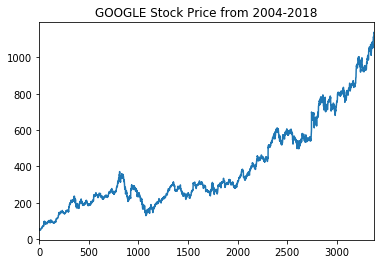

In [35]:
import matplotlib.pyplot as plt

dataset['Adj Close'].plot();
plt.title("GOOGLE Stock Price from 2004-2018")

In [7]:
#Benchmark Model

from sklearn.preprocessing import MinMaxScaler
import csv
scaler = MinMaxScaler()
data=dataset.iloc[:,1:7].values
print(data[1])
X = data[:,1:2]
y = dataset['Close']

y_new = []
for i in y:
    y_new.append([i])
y_new = np.array(y_new)


X = np.array(X)

X=scaler.fit_transform(X)
y_new=scaler.fit_transform(y_new)

[5.0555557e+01 2.2834300e+07 5.4594593e+01 5.0300301e+01 5.4209209e+01
 5.4209209e+01]


In [8]:
#LTSM Model



new_data = scaler.fit_transform(data)
print(new_data[1])

train_X = new_data[:,0:4]

train_y_old = new_data[:,5]

train_Y = []
for i in train_y_old:
    train_Y.append([i])
train_Y = np.array(train_Y)
print(train_Y.shape)


train_X = np.array(train_X)
train_Y = np.array(train_Y)

print(train_X .shape)
print(train_Y.shape)





[0.00083519 0.27335003 0.00334591 0.00210663 0.00381449 0.00381449]
(3378, 1)
(3378, 4)
(3378, 1)


In [9]:
#Linear Regression Model
#Split the data, first
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size = 0.3,shuffle = False,random_state = 0)
print(X_train[1])
print(y_train[1])
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


#initialize the model, second
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model =model.fit(X_train,y_train)
predicted_price = model.predict(X_test)
predicted_train = model.predict(X_train)
print(model.coef_)
print(model.intercept_)

[0.27335003]
[0.00381449]
(2364, 1)
(1014, 1)
(2364, 1)
(1014, 1)
[[-0.41268131]]
[0.24083176]


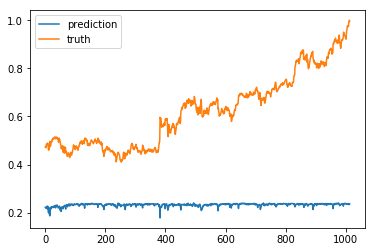

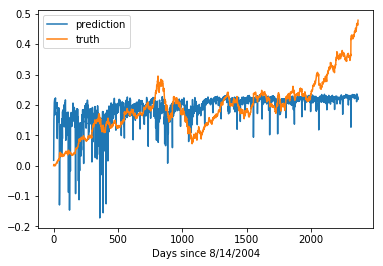

In [10]:
#display the result


import matplotlib.pyplot as plt
plt.plot(predicted_price, label='prediction')
plt.plot(y_test, label='truth')
plt.legend()
plt.show()



plt.plot(predicted_train, label='prediction')
plt.plot(y_train, label='truth')
plt.xlabel('Days since 8/14/2004')
plt.legend()
plt.show()

In [11]:
#Calculating Errors


from sklearn.metrics import r2_score, mean_squared_error
r2_score(y_test,predicted_price),np.sqrt(mean_squared_error(y_test,predicted_price))



(-6.883813509711871, 0.4162894089239953)

In [12]:
#LTSM Model
#splitting data

In [13]:




from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size = 0.3,shuffle = False,random_state = 0)
print(y_train[1])
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)




[0.00381449]
(2364, 4)
(1014, 4)
(2364, 1)


In [14]:
#Window Creation


def windowing(data, window):
    
    sequence = []
    for index in range(len(data) - window):
        sequence.append(data[index: index + window])
    return np.asarray(sequence)



In [15]:
window = 5
X_train2 = windowing(X_train, window)
X_test2 = windowing(X_test, window)
y_train2 = y_train[-X_train2.shape[0]:]
y_test2 = y_test[-X_test2.shape[0]:]

print("x_train", X_train2.shape)
print("y_train", y_train2.shape)
print("x_test", X_test2.shape)
print("y_test", y_test2.shape)

x_train (2359, 5, 4)
y_train (2359, 1)
x_test (1009, 5, 4)
y_test (1009, 1)


In [16]:
#Reshaping Data
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
print(X_train.shape)

(2364, 1, 4)


In [17]:
#initialize model


from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM,Dropout

model = Sequential()
 

model.add(LSTM(units=300, return_sequences=True, input_shape = (X_train.shape[1], 4)))
model.add(Dropout(.2))
 

model.add(LSTM(units=150, return_sequences=False))
model.add(Dropout(.2))




model.add(Dense(units=1, activation='sigmoid'))
 
# Compiling the RN
model.compile(loss='mae', optimizer='nadam', metrics=['mean_squared_error'])

# Train :)
history = model.fit(X_train,y_train, epochs=100,validation_split=0.1, batch_size=32)

############ Save & load Trained Model ############
# Save Trained Model
model.save('TICKER-RNN.h5')



Using TensorFlow backend.


Train on 2127 samples, validate on 237 samples
Epoch 1/100
2127/2127 [==============================] - 4s 2ms/step - loss: 0.1034 - mean_squared_error: 0.0220 - val_loss: 0.1352 - val_mean_squared_error: 0.0198
Epoch 2/100
2127/2127 [==============================] - 2s 1ms/step - loss: 0.0274 - mean_squared_error: 0.0014 - val_loss: 0.0415 - val_mean_squared_error: 0.0018
Epoch 3/100
2127/2127 [==============================] - 2s 1ms/step - loss: 0.0171 - mean_squared_error: 4.8029e-04 - val_loss: 0.0170 - val_mean_squared_error: 4.1794e-04
Epoch 4/100
2127/2127 [==============================] - 2s 1ms/step - loss: 0.0137 - mean_squared_error: 3.0318e-04 - val_loss: 0.0375 - val_mean_squared_error: 0.0015
Epoch 5/100
2127/2127 [==============================] - 2s 1ms/step - loss: 0.0136 - mean_squared_error: 2.8717e-04 - val_loss: 0.0362 - val_mean_squared_error: 0.0013
Epoch 6/100
2127/2127 [==============================] - 2s 1ms/step - loss: 0.0121 - mean_squared_error: 2.3992

2127/2127 [==============================] - 2s 990us/step - loss: 0.0065 - mean_squared_error: 6.5869e-05 - val_loss: 0.0238 - val_mean_squared_error: 8.5713e-04
Epoch 49/100
2127/2127 [==============================] - 2s 1ms/step - loss: 0.0064 - mean_squared_error: 6.4359e-05 - val_loss: 0.0235 - val_mean_squared_error: 8.3476e-04
Epoch 50/100
2127/2127 [==============================] - 2s 983us/step - loss: 0.0060 - mean_squared_error: 5.8918e-05 - val_loss: 0.0209 - val_mean_squared_error: 6.8636e-04
Epoch 51/100
2127/2127 [==============================] - 2s 997us/step - loss: 0.0062 - mean_squared_error: 6.2878e-05 - val_loss: 0.0322 - val_mean_squared_error: 0.0013
Epoch 52/100
2127/2127 [==============================] - ETA: 0s - loss: 0.0065 - mean_squared_error: 6.5562e- - 2s 1ms/step - loss: 0.0065 - mean_squared_error: 6.5514e-05 - val_loss: 0.0308 - val_mean_squared_error: 0.0012
Epoch 53/100
2127/2127 [==============================] - 2s 1ms/step - loss: 0.0061 - me

Epoch 95/100
2127/2127 [==============================] - 2s 983us/step - loss: 0.0042 - mean_squared_error: 2.9330e-05 - val_loss: 0.0062 - val_mean_squared_error: 7.0829e-05
Epoch 96/100
2127/2127 [==============================] - 2s 990us/step - loss: 0.0041 - mean_squared_error: 2.8063e-05 - val_loss: 0.0134 - val_mean_squared_error: 3.0044e-04
Epoch 97/100
2127/2127 [==============================] - 2s 1ms/step - loss: 0.0042 - mean_squared_error: 2.8690e-05 - val_loss: 0.0147 - val_mean_squared_error: 3.3023e-04
Epoch 98/100
2127/2127 [==============================] - 2s 983us/step - loss: 0.0041 - mean_squared_error: 2.7860e-05 - val_loss: 0.0081 - val_mean_squared_error: 1.2144e-04
Epoch 99/100
2127/2127 [==============================] - 2s 968us/step - loss: 0.0041 - mean_squared_error: 2.7275e-05 - val_loss: 0.0209 - val_mean_squared_error: 5.7434e-04
Epoch 100/100
2127/2127 [==============================] - 2s 983us/step - loss: 0.0042 - mean_squared_error: 2.8520e-05 -

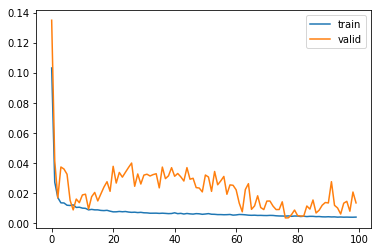

In [18]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.legend()
plt.show()

In [19]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)


In [20]:


from sklearn.metrics import r2_score, mean_squared_error
r2_score(y_test,testPredict),np.sqrt(mean_squared_error(y_test,testPredict))



(0.9110467131714055, 0.04421892604371353)

In [39]:
#Improving the LTSM Model

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM,Dropout

model = Sequential()
 

model.add(LSTM(units=200, return_sequences=True, input_shape = (X_train2.shape[1], 4)))
model.add(Dropout(.2))
 

model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(.2))




model.add(Dense(units=1, activation='sigmoid'))
 
model.compile(loss='mae', optimizer='nadam', metrics=['mean_squared_error'])

history = model.fit(X_train2,y_train2, epochs=20,validation_split=0.1, batch_size=32)

Train on 2123 samples, validate on 236 samples
Epoch 1/20
2123/2123 [==============================] - 5s 2ms/step - loss: 0.0658 - mean_squared_error: 0.0101 - val_loss: 0.1181 - val_mean_squared_error: 0.0144
Epoch 2/20
2123/2123 [==============================] - 3s 1ms/step - loss: 0.0295 - mean_squared_error: 0.0014 - val_loss: 0.0417 - val_mean_squared_error: 0.0019
Epoch 3/20
2123/2123 [==============================] - 3s 1ms/step - loss: 0.0226 - mean_squared_error: 7.7809e-04 - val_loss: 0.0225 - val_mean_squared_error: 8.9956e-04
Epoch 4/20
2123/2123 [==============================] - 3s 1ms/step - loss: 0.0177 - mean_squared_error: 4.9272e-04 - val_loss: 0.0427 - val_mean_squared_error: 0.0021
Epoch 5/20
2123/2123 [==============================] - 3s 1ms/step - loss: 0.0159 - mean_squared_error: 3.9516e-04 - val_loss: 0.0477 - val_mean_squared_error: 0.0025
Epoch 6/20
2123/2123 [==============================] - 3s 1ms/step - loss: 0.0136 - mean_squared_error: 2.9473e-04 -

In [40]:
trainPredict = model.predict(X_train2)
testPredict = model.predict(X_test2)

In [41]:
from sklearn.metrics import r2_score, mean_squared_error
r2_score(y_test2,testPredict),np.sqrt(mean_squared_error(y_test2,testPredict))



(0.9560398615848988, 0.031087049091358874)

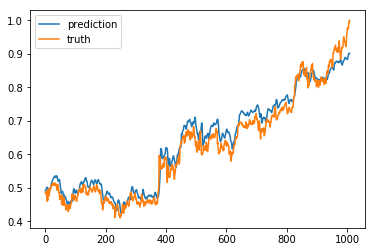

In [42]:
plt.plot(testPredict, label='prediction')
plt.plot(y_test2, label='truth')
plt.legend()
plt.show()

In [24]:

import math
import pandas as pd
import numpy as np

# import Google Finanace API libraries
from googlefinance.client import get_price_data

# import data visualization libraries
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# import other libraries
import datetime as dt
import time
#Check Model with different stock 


def get_data(path):
    dataframe=pd.read_csv(path)
    print(dataframe.head())
    
    return

data= get_data('GE.csv')

         Date       Open       High        Low      Close  Adj Close    Volume
0  2004-08-19  32.630001  32.740002  32.330002  32.709999  19.719440  13998500
1  2004-08-20  32.660000  32.799999  32.490002  32.650002  19.683273  16269200
2  2004-08-23  32.680000  32.740002  32.459999  32.509998  19.598867  13402200
3  2004-08-24  32.700001  32.750000  32.410000  32.630001  19.671211  15862300
4  2004-08-25  32.520000  32.990002  32.419998  32.790001  19.767666  15740300


In [25]:
import csv

with open('GE.csv', 'r') as infile, open('GE_ORDER.csv', 'a') as outfile:
    
    fieldnames = ['Date', 'Open', 'Volume','High','Low','Close', 'Adj Close']
    writer = csv.DictWriter(outfile, fieldnames=fieldnames)

    writer.writeheader()
    for row in csv.DictReader(infile):
      
        writer.writerow(row)

In [26]:
dataset = pd.read_csv('GE_ORDER.csv')
print(dataset.head())

         Date       Open    Volume       High        Low      Close  Adj Close
0  2004-08-19  32.630001  13998500  32.740002  32.330002  32.709999  19.719440
1  2004-08-20  32.660000  16269200  32.799999  32.490002  32.650002  19.683273
2  2004-08-23  32.680000  13402200  32.740002  32.459999  32.509998  19.598867
3  2004-08-24  32.700001  15862300  32.750000  32.410000  32.630001  19.671211
4  2004-08-25  32.520000  15740300  32.990002  32.419998  32.790001  19.767666


In [27]:
data=dataset.iloc[:,1:7].values
new_data = scaler.fit_transform(data)
print(new_data[1])

train_X = new_data[:,0:4]

train_y_old = new_data[:,4]

train_Y = []
for i in train_y_old:
    train_Y.append([i])
train_Y = np.array(train_Y)
print(train_Y.shape)


train_X = np.array(train_X)
train_Y = np.array(train_Y)

print(train_X .shape)
print(train_Y.shape)

window = 5
train_X = windowing(train_X , window)
train_Y = train_Y[-train_X .shape[0]:]



[0.73441045 0.01208164 0.73270433 0.74088513 0.7329386  0.58936811]
(3378, 1)
(3378, 4)
(3378, 1)


In [28]:
print(train_X.shape)
print(train_Y.shape)

(3373, 5, 4)
(3373, 1)


In [29]:
trainPredict = model.predict(train_X)

In [30]:
from sklearn.metrics import r2_score, mean_squared_error
r2_score(train_Y,trainPredict),np.sqrt(mean_squared_error(train_Y,trainPredict))

(0.9639816635549392, 0.04097459145117883)

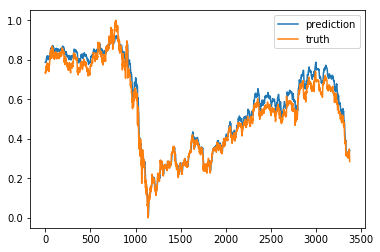

In [31]:
plt.plot(trainPredict, label='prediction')
plt.plot(train_Y, label='truth')
plt.legend()
plt.show()

